In [155]:
import skimage as sk
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from copy import copy
import napari

In [139]:
image = sk.io.imread('./../domes/Dome103_processed.tif')
prediction_image = sk.io.imread('./../domes/Dome103_processed_n2v2d.tif')

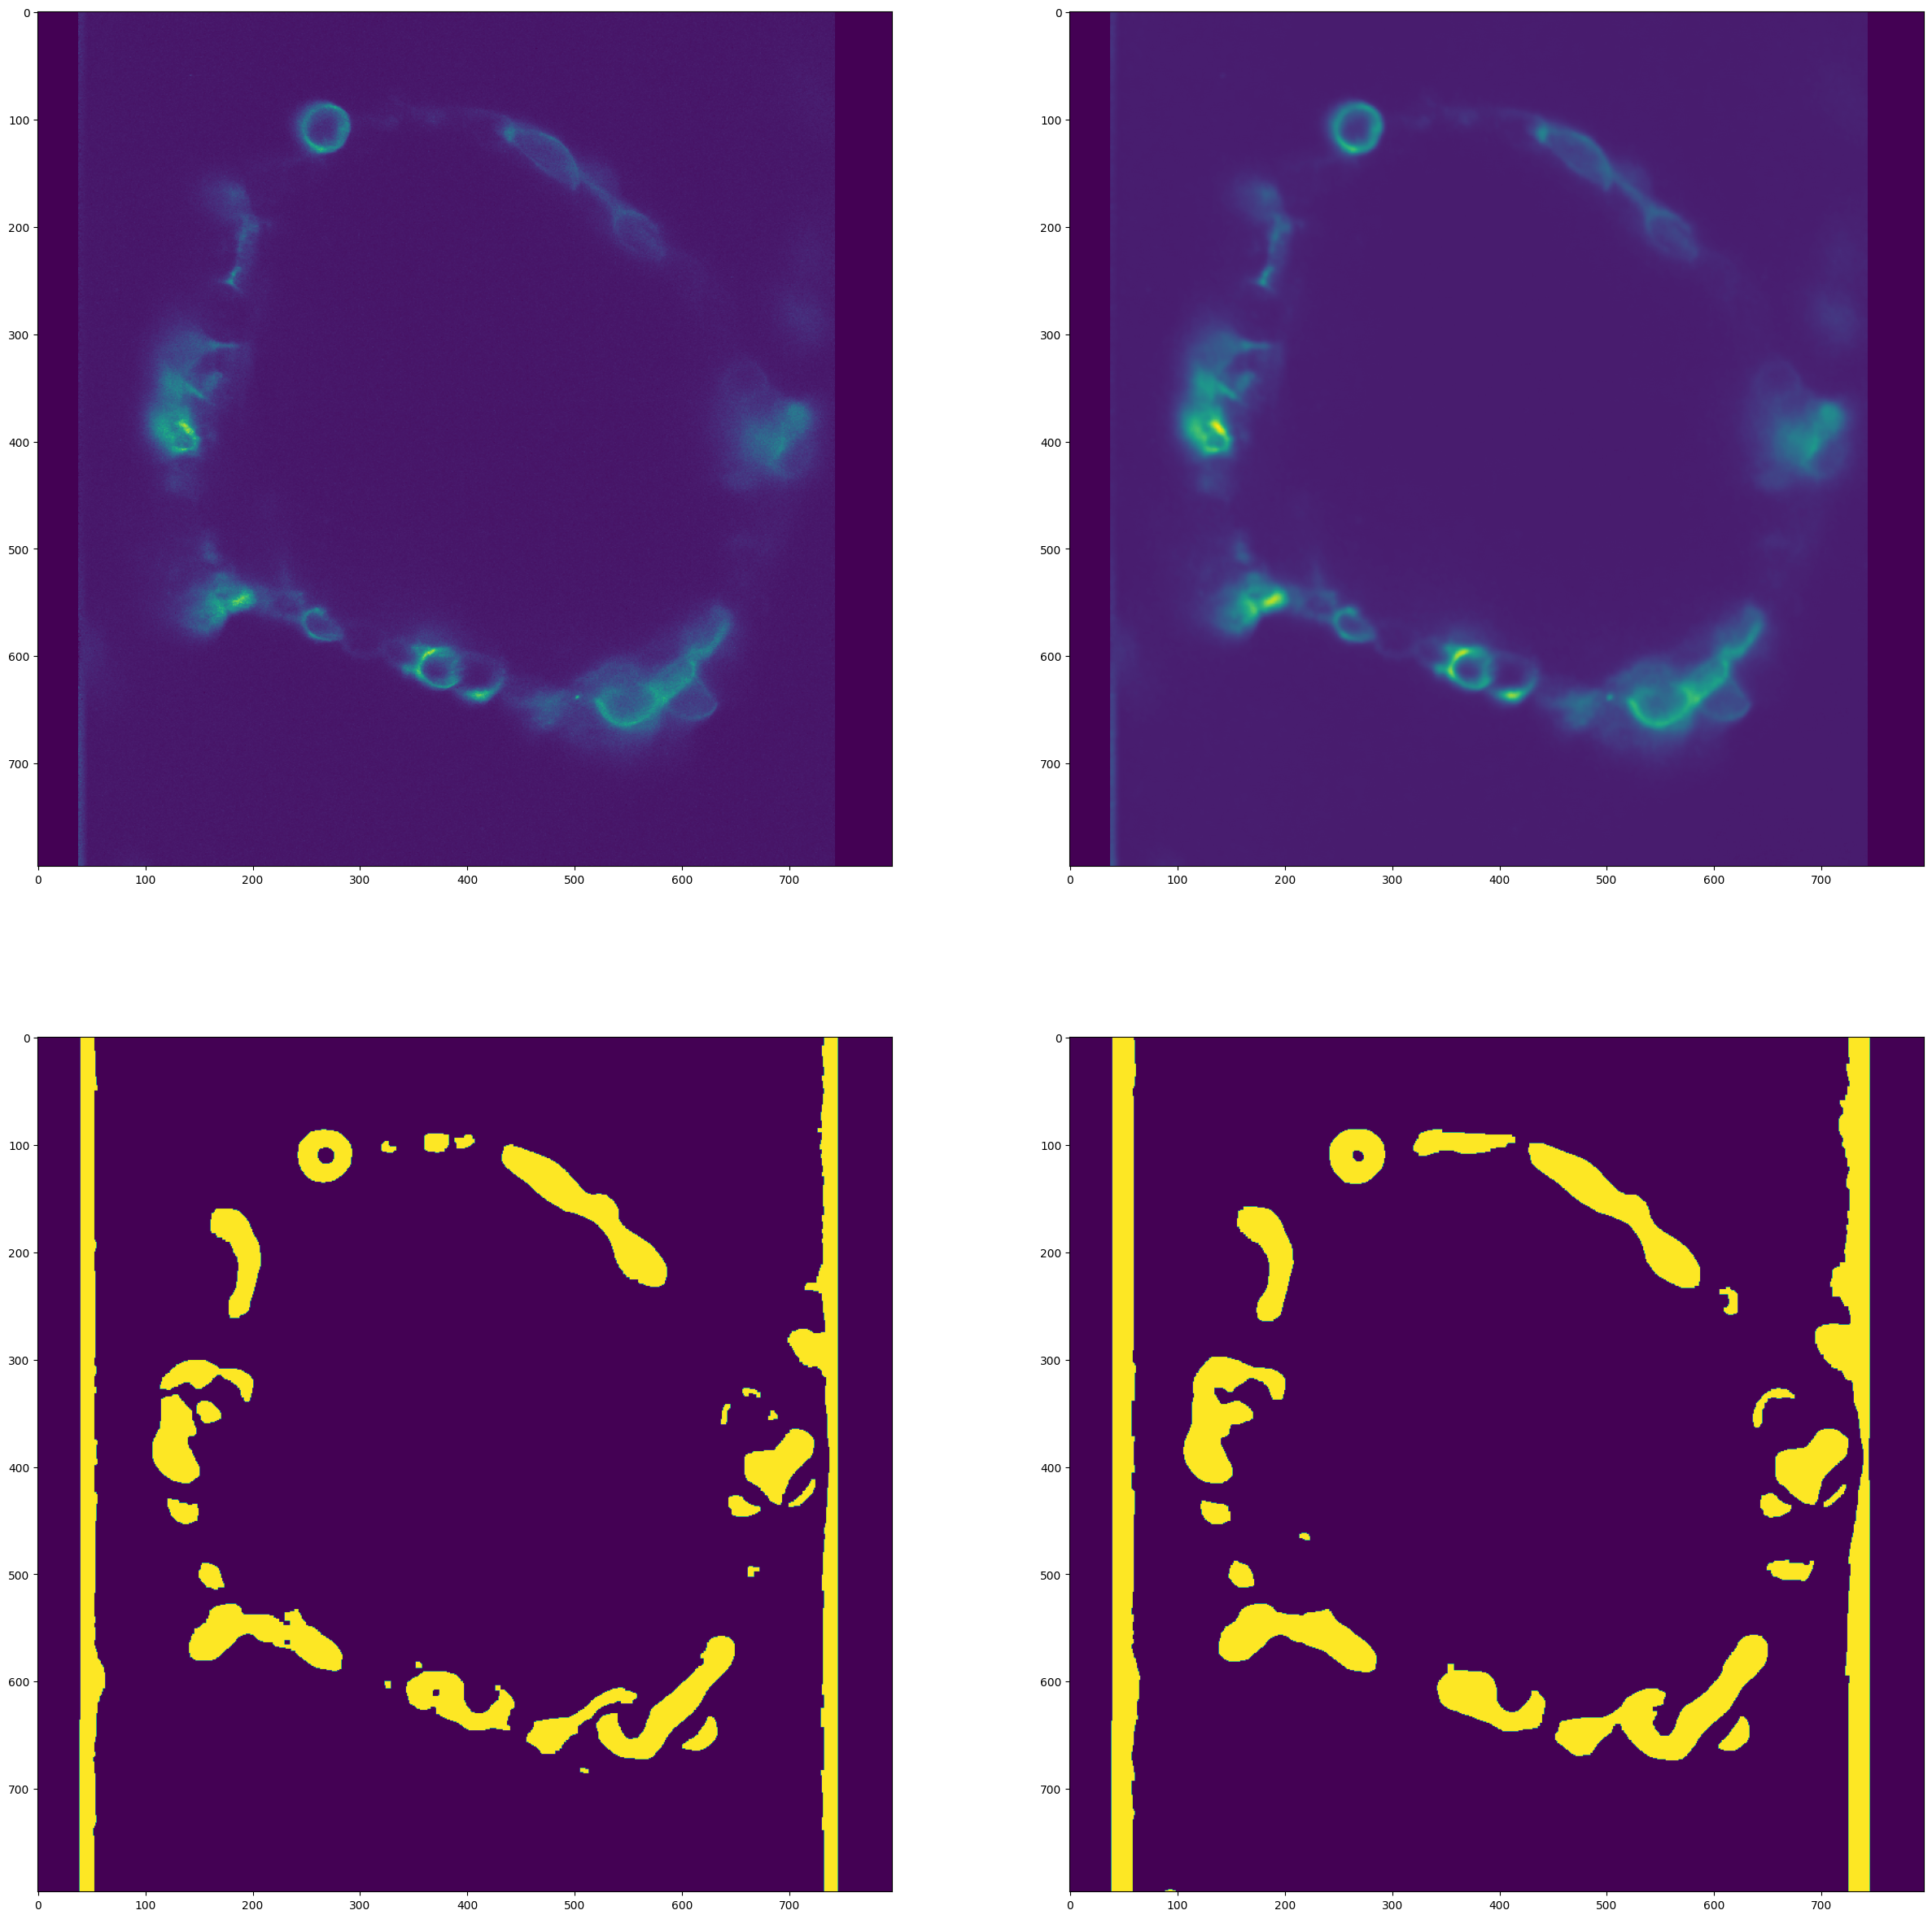

In [87]:
z_pos = 200

im = image[z_pos]
pred_im = prediction_image[z_pos]


kernel = np.ones((4,4), np.uint8)

im = im.astype(np.uint8)
gaussian_im = gaussian_filter(im, sigma=1)
median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
th3_im = cv.morphologyEx(th3_im, cv.MORPH_OPEN, kernel=kernel)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)

pred_im = pred_im.astype(np.uint8)
gaussian_pred_im = gaussian_filter(pred_im, sigma=1) 
median_pred_im = sk.filters.rank.median(gaussian_pred_im, sk.morphology.star(12))
th3_pred_im = cv.adaptiveThreshold(median_pred_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 85, -1) # Needs uint8 to make the asaptive threshold mask
th3_pred_im = cv.morphologyEx(th3_pred_im, cv.MORPH_OPEN, kernel=kernel)
th3_pred_im = cv.morphologyEx(th3_pred_im, cv.MORPH_CLOSE, kernel=kernel)

# _, th3_pred_im = cv.threshold(median_pred_im, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.figure(figsize=(30,30))
plt.subplot(2,2,1)
plt.imshow(image[z_pos])
plt.subplot(2,2,2)
plt.imshow(prediction_image[z_pos])
plt.subplot(2,2,3)
plt.imshow(th3_im)
plt.subplot(2,2,4)
plt.imshow(th3_pred_im)


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'morphologyEx'
> Overload resolution failed:
>  - src data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


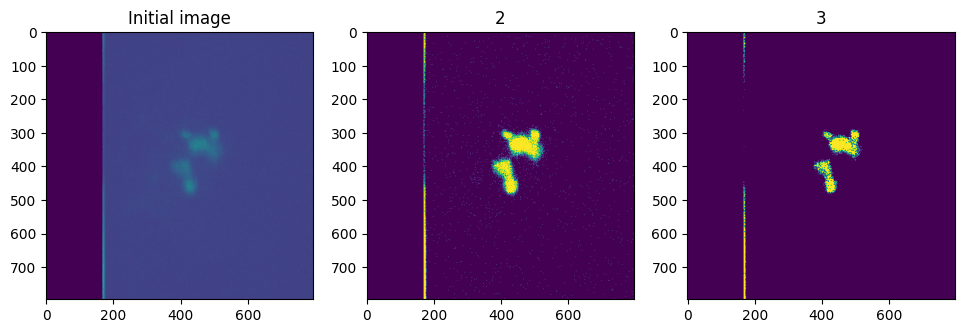

In [244]:
image = sk.io.imread('./../domes/Dome103_processed.tif')
z_pos = 70
im = copy(image[z_pos])

non_zero_cols = np.any(im != 0, axis = 0)
first_non_zero_col = np.argmax(non_zero_cols)
last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]

plt.figure(figsize=(20,20))
plt.subplot(2,5,1)
plt.imshow(im)
plt.title('Initial image')

# print(np.mean(clean_image))
# im[im < np.mean(clean_image)] = 0
# im[im > np.mean(clean_image)] = 255
# print(np.mean(im))



th = sk.filters.threshold_otsu(clean_image)
im = im > th

im[im == False] = 0
im[im == True] = 1

plt.subplot(2,5,2)
plt.imshow(im)
plt.title('2')




#th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
# th3_im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel=kernel)
kernel = np.ones((2,2), np.uint8)
th3_im = sk.morphology.erosion(im, kernel)



# th3_im = sk.morphology.area_closing(th3_im, 2)

plt.subplot(2,5,3)
plt.imshow(th3_im)
plt.title('3')



kernel = np.ones((4,4), np.uint8)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel) # Closes holes

plt.subplot(2,5,4)
plt.imshow(th3_im)
plt.title('4')

kernel = np.ones((4,4), np.uint8)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_OPEN, kernel=kernel)

plt.subplot(2,5,5)
plt.imshow(th3_im)
plt.title('5')



kernel = np.ones((4,4), np.uint8)

gaussian_im = gaussian_filter(th3_im, sigma=1)
median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
# th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
th3_im = cv.morphologyEx(median_im, cv.MORPH_OPEN, kernel=kernel)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
# th3_im = th3_im.astype(np.uint8)
# th2 = cv.adaptiveThreshold(th3_im,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,55,2)

plt.subplot(2,2,3)
plt.imshow(th3_im)
plt.title('Final')





In [224]:
# mask 1

image = sk.io.imread('./../domes/Dome103_processed.tif')
mask = []
for im in image:
    
    non_zero_cols = np.any(im != 0, axis = 0)
    first_non_zero_col = np.argmax(non_zero_cols)
    last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
    clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]
    
    im[im < np.mean(clean_image)] = 0
    im[im > np.mean(clean_image)] = 255
    
    kernel = np.ones((4,4), np.uint8)

    th3_im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel=kernel)
    th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)

    gaussian_im = gaussian_filter(th3_im, sigma=1)
    median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
    # th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
    th3_im = cv.morphologyEx(median_im, cv.MORPH_OPEN, kernel=kernel)
    th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
    th3_im = th3_im.astype(np.uint8)
    # th2 = cv.adaptiveThreshold(th3_im,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,55,2)
    
    mask.append(th3_im)
    
mask = np.array(mask)

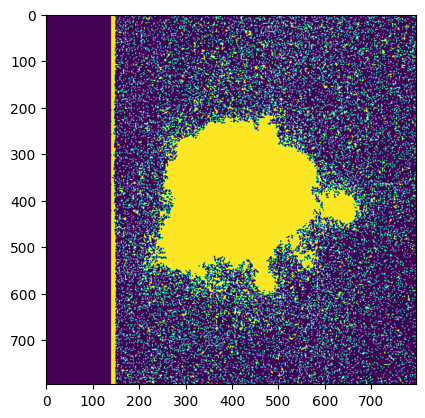

In [195]:
image = sk.io.imread('./../domes/Dome103_processed.tif')
mask = []
c = 1
for im in image:
    if c == 100:
        non_zero_cols = np.any(im != 0, axis = 0)
        first_non_zero_col = np.argmax(non_zero_cols)
        last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
        clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]
        
        im[im < np.mean(clean_image)] = 0
        im[im > np.mean(clean_image)] = 255
        
        
        
        kernel = np.ones((2,2), np.uint8)


        #th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
        # th3_im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel=kernel)
        th3_im = sk.morphology.dilation(im, kernel)
        th3_im = sk.morphology.area_closing(th3_im)
        th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
        th3_im = cv.morphologyEx(th3_im, cv.MORPH_OPEN, kernel=kernel)


        plt.imshow(th3_im)

        gaussian_im = gaussian_filter(th3_im, sigma=1)
        median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
        # th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
        th3_im = cv.morphologyEx(median_im, cv.MORPH_OPEN, kernel=kernel)
        th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
        
        
        
        break
        mask.append(th3_im)
    print(c, end='\r')
    c+=1
    # if c==10:
    #     plt.imshow(th3_im)
    #     break
    
mask = np.array(mask)

In [182]:
viewer = napari.Viewer()
viewer.add_image(mask)

<Image layer 'mask' at 0x2538577b010>